# 정형 데이터와 비정형 데이터
- 정형 데이터 : 데이터베이스에 담을 수 있는 데이터 (행과 열이 잘 구분되어 있는 데이터)
- 비정형 데이터 : 데이터베이스, 엑셀로 표현하기 어려운 데이터 (텍스트, 오디오, 이미지, 영상 등)

# 랜덤 포레스트 (RandomForest)
- 대표적인 앙상블 알고리즘
- 결정 트리를 랜덤하게 여러 개 만들고 각 결정 트리의 예측을 사용해 최종 예측을 만든다.
- 트리의 성능을 낮추는 효과가 있다.

## 랜덤 포레스트 훈련 방법
- 부트스트랩 샘플을 사용
- 부트스트랩 샘플 : 원래 샘플에서 랜덤하게 샘플링한다. (동일한 샘플 선택 가능 -> 중복을 허용한 샘플링)
- 훈련 샘플이 항상 달라진다.
- 중복된 값이 있기에 성능이 좋지는 않다.
- 각각의 결정 트리 훈련에서 나온 결과를 평균한다.

## 랜덤 포레스트 샘플링
- 최선의 특성을 찾지 못하게 훼방 놓는다.

### 부트스트랩 샘플(Boostrap sample)
- 데이터 세트에서 중복을 허용하여 데이터를 샘플링 하는 방식(데이터 세트와 부트스트랩 샘플의 개수는 같다.)    

1. 훈련 세트에서 랜덤하게 데이터 하나를 가져온다.
2. 랜덤하게 가져온 데이터를 다시 넣는다.
3. 훈련 세트에서 랜덤하게 데이터를 하나 가져온다.
4. 1->2->3 을 훈련 세트만큼 뽑을 때까지 반복한다.

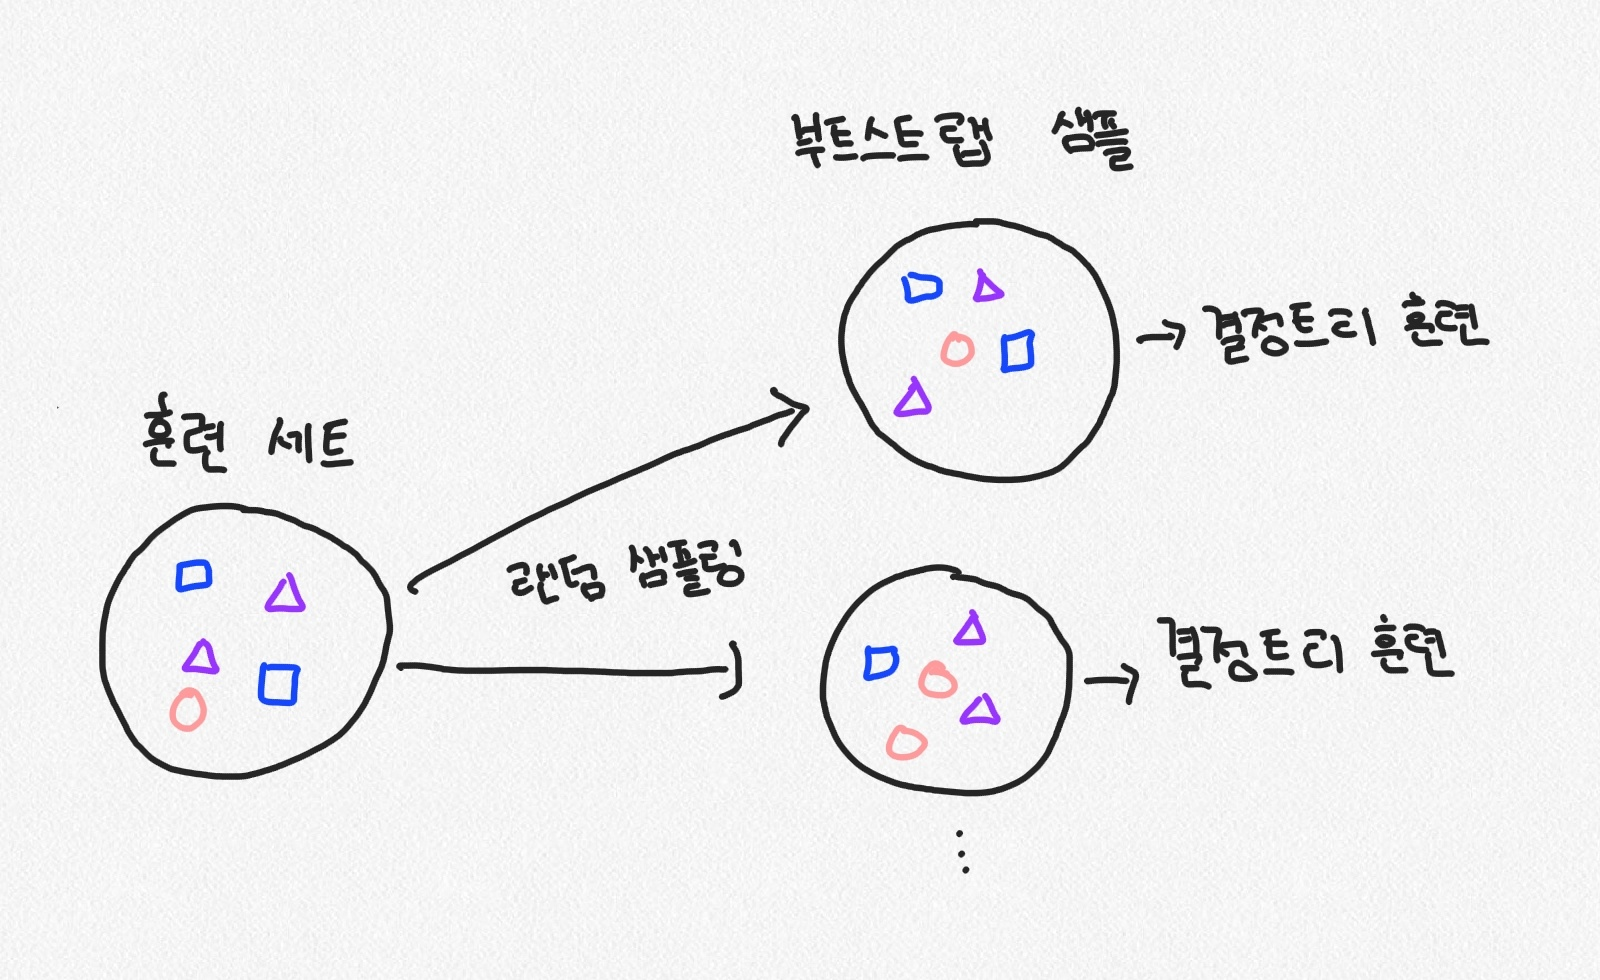

### 랜덤 포레스트의 훈련 방법
- 각 노드를 분할할 때 전체 특성 중에서 일부 특성을 랜덤하게 고르고, 최선의 분할을 찾는다.
- RandomForestClassifier(분류 모델) : 전체 특성 개수의 제곱근만큼의 특성을 선택한다. (4개의 특성이 있으면 노드마다 2개를 랜덤하게 선택하여 사용)
- RandomForestRegressor(회귀 모델) : 전체 특성 사용

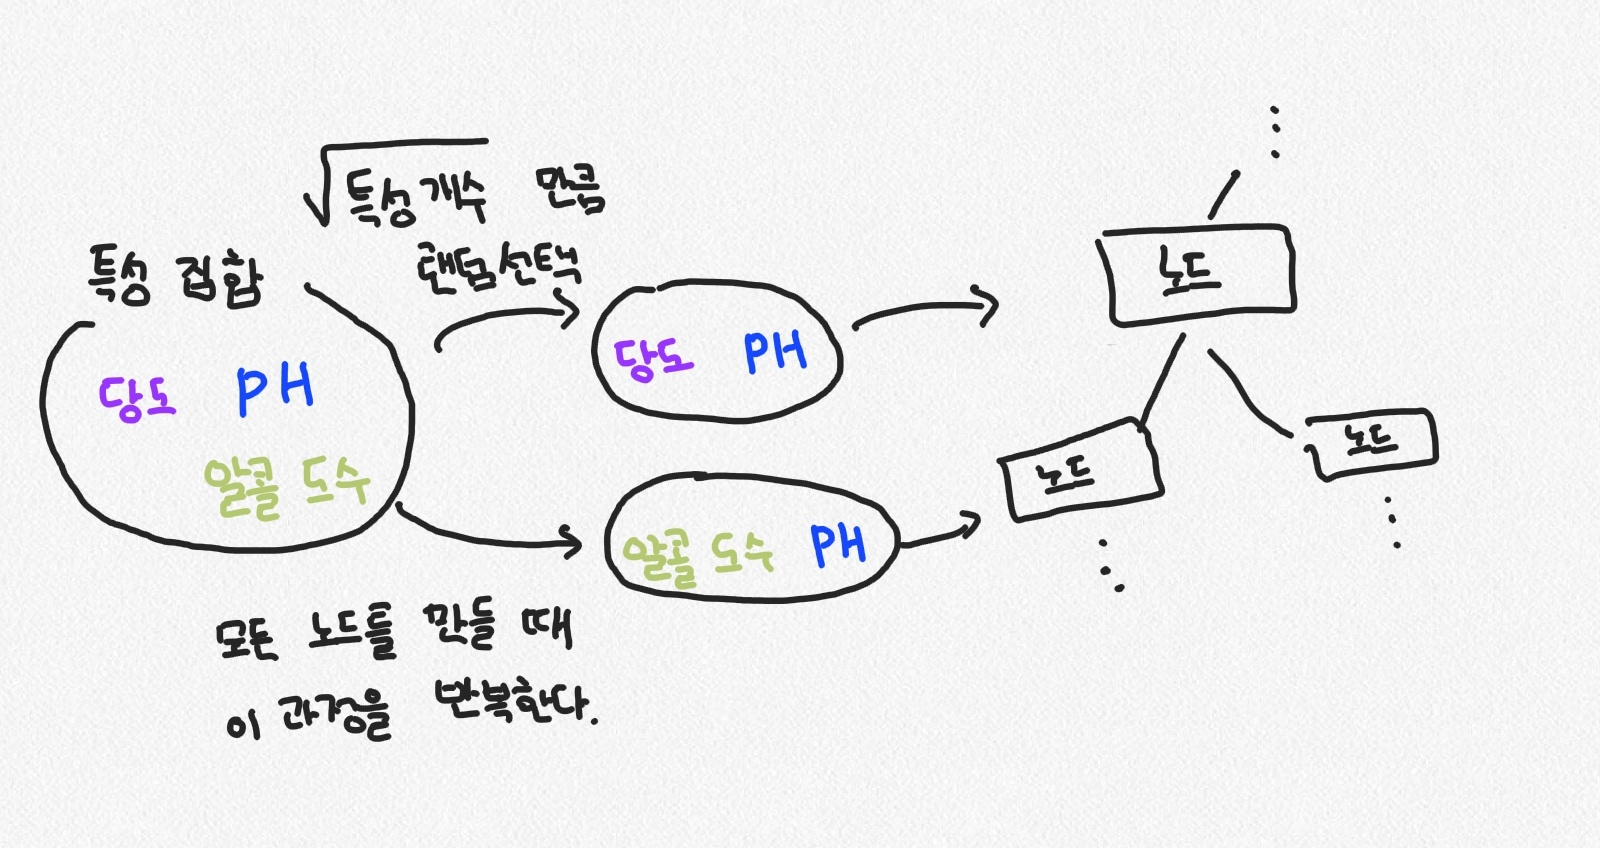

# 랜덤 포레스트 훈련

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target= wine['class'].to_numpy()

train_input, test_input, train_target, test_target= train_test_split(
    data, target, test_size=0.2, random_state = 42)

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(n_jobjs, random_state)    
- n_jobs : 코어 사용  개수(-1일 경우 모든 코어 사용)


cross_validate(rf, train_input, train_target, return_train_score, n_jobs)
- return_train_score : 훈련 점수도 가져올지)

In [3]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(rf, train_input, train_target, 
                        return_train_score = True, n_jobs = -1)

In [4]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


rf.feature_importances_ : 특성의 중요도 확인

In [5]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


RandomForestClassifier(oob_score, n_jobs, random_state)
- oob : Tree에 담기지 않은 남은 샘플
- oob_score : True할 경우, oob샘플에 대한 모델의 성능을 평가하여 저장한다.    
rf.oob_score_로 확인해볼 수 있다.

In [6]:
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


# 엑스트라 트리(ExtraTree)
- 결정 트리의 노드를 랜덤하게 분할함
- 분류일때는 특성에 제곱근을 사용 (일부 특성 사용), 회귀일때는 전체 특성을 사용한다.
- 부트스트랩 샘플을 사용하지 않고, 전체 샘플을 사용한다.
- 트리의 성능(과대 적합)을 억제하기 위해 노드 분할을 랜덤하게 한 후, 가장 불순도가 좋은 노드를 찾아서 분할한다.
- 랜덤하게 분할하기에 속도가 빠르고, 랜덤 포레스트보다는 트리 개수가 많아야 좋은 결과가 나온다.

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

In [8]:
et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
scores= cross_validate(et, train_input, train_target,
                       return_train_score = True, n_jobs = -1)

In [9]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [10]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


# 그레디언트 부스팅(GradientBoosting)
- 가장 좋은 알고리즘
- 얕은 결정 트리를 연속적으로 추가하여 이전 트리의 오차를 보완하는 방식으로 앙상블하는 방법(손실함수 최소화)
- 경사 하강법을 사용하여 트리 앙상블에 추가 (분류에서는 로지스틱 손실 함수를 사용하고, 회귀에서는 평균 제곱 오차 함수 사용)
- 이전 트리의 손실을 보완하면서 얕은 결정트리를 연속하여 추가한다.
- 학습 성능이 너무 좋은 gradient는 최적점을 지나치게 된다.
- 트리를 계속 추가하여 학습시간이 오래 걸린다.

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


GradientBoostingClassifier(n_estimators, learning_rate, random_state)
- n_estimators : 결정 트리 개수
-learning_rate : 학습률

In [13]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, 
                        return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [14]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


# 히스토그램 기반 그레디언트 부스팅(Histogram-based Gradient Boosting)
- 입력 특성을 256개 구간으로 나누어 하나를 떼어 놓고 누락된 값을 위해서 사용 -> 입력에 누락된 특성이 있어도 전처리 할 필요 없다.
- 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있다.


enable_hist_gradient_boosting은 import만 하면 된다.

In [15]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


cross_validate로 교차 검증

In [16]:
hgb = HistGradientBoostingClassifier(random_state = 42)
scores = cross_validate(hgb, train_input, train_target, 
                        return_train_score = True, n_jobs = -1)

In [17]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


### permutation_importance()
특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화하는지 관찰하여 어떤 특성이 중요한지 계산 (특성 중요도, 평균, 표준 편차를 반환함)    
- permutation_importance(특성 중요도를 확인할 모델, 훈련세트 input, 훈련세트 output, n_repeats, random_state, n_jobs)
- n_repeats : 랜덤하게 섞을 횟수 지정 (만약 10이면, 특성을 10번씩 섞는다.)

In [18]:
from sklearn.inspection import permutation_importance

In [19]:
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats = 10,
                                random_state = 42, n_jobs = -1)

importances_mean : 특성별 평균    
정확도가 0.088, 0.23, 0.08만큼 떨어진다는 뜻으로. 0.23이 제일 중요하다.

In [20]:
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [21]:
result = permutation_importance(hgb, test_input, test_target, n_repeats = 10,
                                random_state = 42, n_jobs = -1)

In [22]:
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [23]:
hgb.score(test_input, test_target)

0.8723076923076923

## 히스토그램 기반 그레디언트 부스팅 알고리즘 구현 라이브러리

### XGBoost
XGBClassifier(tree_method = 'hist') : 모델 훈련 방식을 hist로 주어 히스토그램 기반 그레디언트 부스팅 모델을 만든다.
- 코랩에서 사용 가능
- 사이킷런의 cross_validate() 함수 사용 가능

In [25]:
from xgboost import XGBClassifier

In [27]:
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score = True, n_jobs = -1)

In [28]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8824322471423747 0.8726214185237284


### LightGBM

- 마이크로소프트에서 만들었다.
- 빠르고 최신 기술 많이 적용
- 코랩에서 사용 가능

In [29]:
from lightgbm import LGBMClassifier

In [30]:
lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, train_input, train_target,
                        return_train_score = True, n_jobs = -1)

In [32]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9338079582727165 0.8789710890649293
